In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [91]:
df=pd.read_csv("/content/AIML Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [93]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [94]:
df.dropna(inplace=True)

In [95]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [96]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


Text(0, 0.5, 'Count')

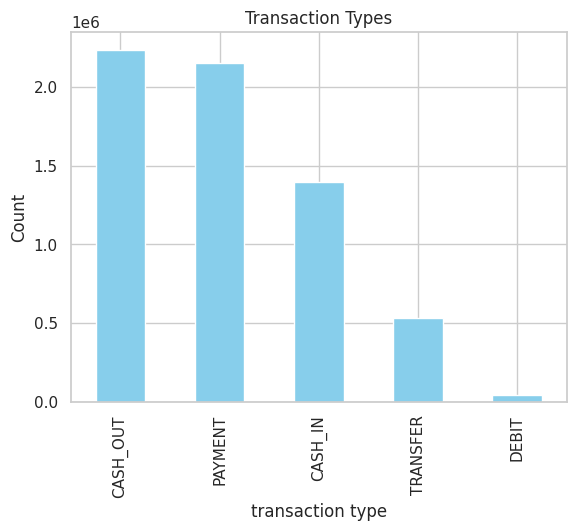

In [97]:
df['type'].value_counts().plot(kind='bar',title="Transaction Types",color="skyblue")
plt.xlabel("transaction type")
plt.ylabel("Count")

<Axes: title={'center': 'Fraud '}, xlabel='type'>

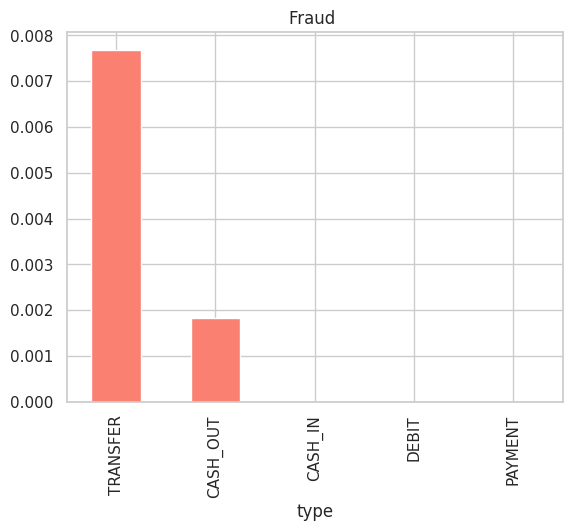

In [98]:
fraud_by_type = df.groupby("type")['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud ",color="salmon")

In [99]:
df['amount'].describe().astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


Text(0.5, 0, 'Log (amount + 1)')

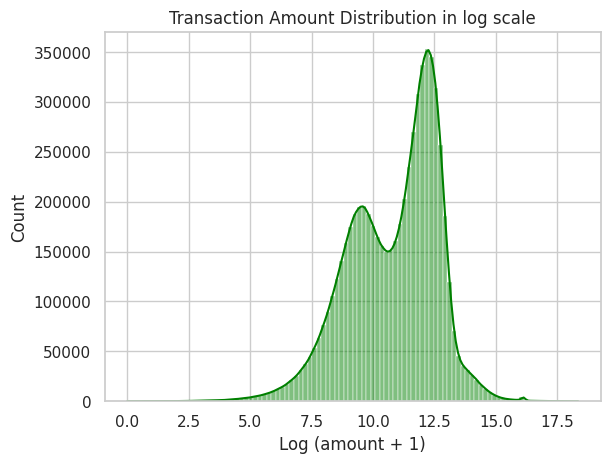

In [100]:
sns.histplot(np.log1p(df['amount']),bins=100,kde=True,color='green')
plt.title("Transaction Amount Distribution in log scale")
plt.xlabel("Log (amount + 1)")

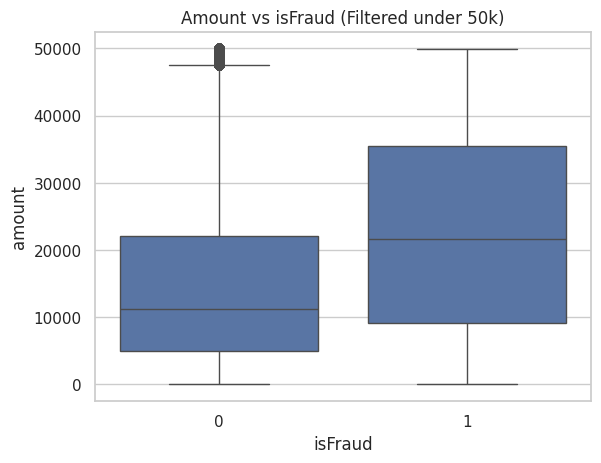

In [101]:
sns.boxplot(data=df[df['amount'] < 50000], x='isFraud' , y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [102]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [103]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [104]:
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [105]:
print((df['balanceDiffOrig'] < 0 ).sum())
print((df['balanceDiffDest'] < 0 ).sum())

1399253
1238864


Text(0.5, 0, 'steps')

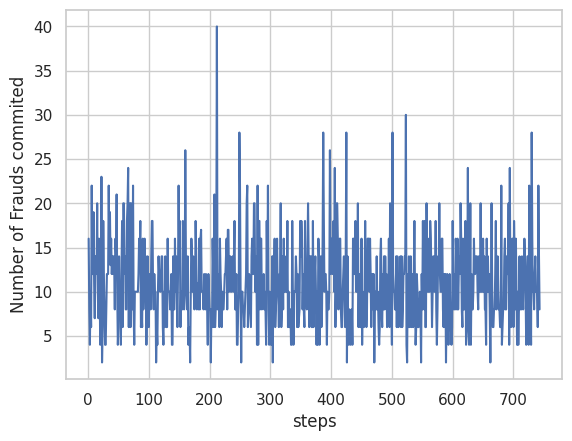

In [106]:
frauds_per_step = df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values,label="Frauds per step")
plt.ylabel('Number of Frauds commited')
plt.xlabel('steps')

In [107]:
df.drop(columns=['step'],inplace=True)

In [108]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [109]:
top_recievers=df[df['isFraud']==1]['nameDest'].value_counts().head

In [110]:
top_recievers

<bound method NDFrame.head of nameDest
C1981613973    2
C410033330     2
C1366192319    2
C1655359478    2
C803116137     2
              ..
C2013070624    1
C1408872887    1
C1840253816    1
C659106449     1
C377165949     1
Name: count, Length: 8169, dtype: int64>

In [111]:
fraud_types=df[df['type'].isin(["TRANSFER","CASH_OUT"])]
fraud_types['type'].value_counts()

,count
type,
CASH_OUT,2237500
TRANSFER,532909


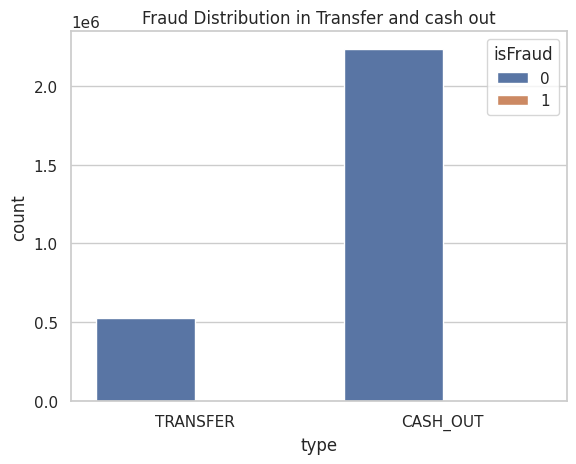

In [112]:
sns.countplot(data=fraud_types,x='type',hue='isFraud')
plt.title('Fraud Distribution in Transfer and cash out')
plt.show()

In [113]:
correy=df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']]

In [114]:
correy.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

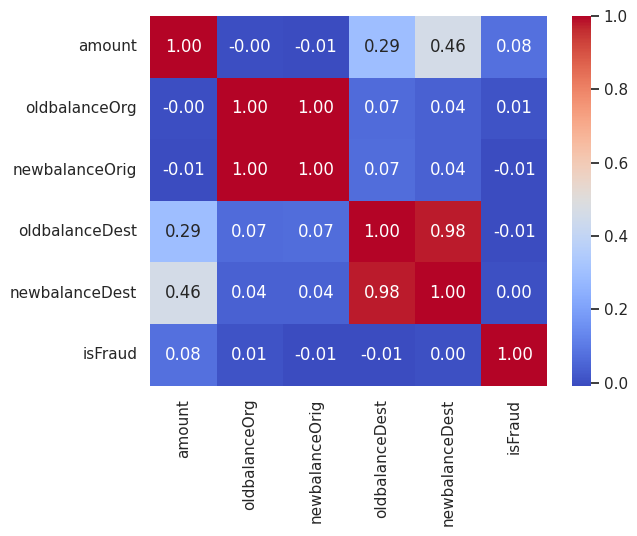

In [115]:
sns.heatmap(correy.corr(),annot=True,cmap='coolwarm',fmt='.2f')

In [116]:
zero_balance_after_transfer=df[(df['oldbalanceOrg']>0) & (df['newbalanceOrig']==0) & (df['type'].isin(['TRANSFER','CASH_OUT']))]

In [117]:
len(zero_balance_after_transfer)

1188074

In [118]:
zero_balance_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [120]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [121]:
df_model=df.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [122]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [123]:
categorical=['type']
numeric=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [124]:
y = df_model['isFraud']
X = df_model.drop(columns=['isFraud','balanceDiffOrig','balanceDiffDest'],axis=1)

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [126]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ]
)


In [127]:
pipeline = Pipeline([
    ('prep',preprocessor),
    ('clf',RandomForestClassifier())
])

In [128]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf', RandomForestClassifier())])

In [129]:
y_pred=pipeline.predict(X_test)

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.80      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [131]:
confusion_matrix(y_test,y_pred)

array([[1270852,      52],
       [    332,    1288]])

In [132]:
pipeline.score(X_test,y_test)

0.9996982375185065

In [133]:
import joblib
joblib.dump(pipeline,'fraud_detection.pkl')

['fraud_detection.pkl']

In [135]:
fraud_preds_true = X_test[(y_pred == 1) & (y_test == 1)]
fraud_preds_true.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3960303,CASH_OUT,806863.30,806863.30,0.00,2344186.16,3151049.45
2736446,TRANSFER,4953893.08,4953893.08,4953893.08,0.00,0.00
1030272,CASH_OUT,1170282.92,1170282.92,0.00,173264.14,1343547.06
1212611,CASH_OUT,1159010.44,1159010.44,0.00,175085.52,1334095.97
6328876,CASH_OUT,953615.38,953615.38,0.00,0.00,953615.38
